### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
sns.set(style="whitegrid")

### Loading data

In [2]:
DATA_FILE = 'CPCT02220079.annotated.processed.tsv'

In [3]:
df = pd.read_csv(DATA_FILE, sep='\t', usecols=['CHROM', 'POS', 'REF', 'ALT', 'INFO:DP'], dtype={'CHROM': str})

### Check column types

In [4]:
df.describe()

,POS,INFO:DP
count,5.062781e+06,5.062781e+06
mean,7.666844e+07,4.809788e+01
std,5.619188e+07,7.795292e+01
min,7.300000e+01,1.000000e+00
25%,3.014427e+07,3.500000e+01
50%,6.649732e+07,4.200000e+01
75%,1.130995e+08,4.900000e+01
max,2.492403e+08,8.967000e+03


### Calculating mean coverage for every variant grouped by chromosome

In [5]:
mean_coverage_by_chrom = df[['CHROM', 'INFO:DP']].groupby('CHROM').mean()

#### Change name for index and columns in dataframe

In [6]:
mean_coverage_by_chrom.columns = ['mean_coverage']
mean_coverage_by_chrom.index.name = 'chromosome'

In [7]:
mean_coverage_autosoms = mean_coverage_by_chrom[~mean_coverage_by_chrom.index.isin(['MT'])]

In [8]:
chr_order = sorted(mean_coverage_autosoms.index.tolist()[:-2], key=int) + ['X', 'Y']

### Barplot using index on x axis and coverage on y axis

[Text(0, 0.5, 'Mean coverage'),
 Text(0.5, 0, 'Chromosome'),
 Text(0.5, 1.0, 'Mean variant allele frequency')]

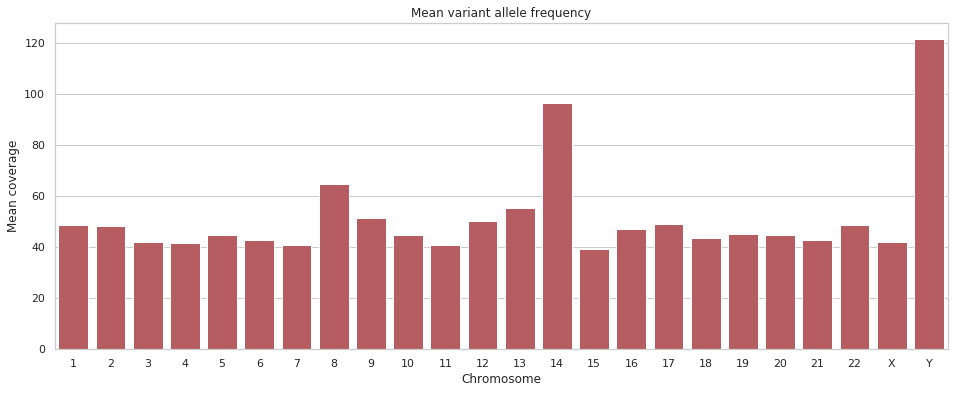

In [9]:
plt.figure(figsize=(16, 6))
sns.barplot(x=chr_order, y=mean_coverage_autosoms["mean_coverage"], data=mean_coverage_autosoms, color='r').set(xlabel='Chromosome', ylabel='Mean coverage', title="Mean variant allele frequency")

### Savig to excel file

In [10]:
mean_coverage_by_chrom.to_excel('zadanie6.xlsx')
mean_coverage_by_chrom.to_csv('zadanie6.tsv', sep='\t')